In [1]:
import pandas as pd
import numpy as np

c:\Users\ye2208\Anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
c:\Users\ye2208\Anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


In [20]:
# 1. Data Preparation

princess_plus = {
    'AMR': [240,170,130,90,110,130,110,110,110,130,70,90,100,80,90],
    'Europe': [100,80,90,80,70,60,60,60,50,50,50,80,80,60,50],
    'PAC': [150,220,240,150,130,120,110,100,110,100,120,130,160,120,100]
}



dwarf_plus= {
    'AMR': [320,220,170,190,200,170,160,160,140,140,180,160,160,170,190],
    'Europe': [80,100,60,100,100,90,80,80,80,70,90,80,80,80,70],
    'PAC': [230,210,140,140,140,150,140,175,140,90,90,100,110,100,90]
}

df_princess = pd.DataFrame(princess_plus)
df_dwarf = pd.DataFrame(dwarf_plus)

# 2. Forecast
def weighted_average_prediction(princess_data, dwarf_data, princess_price, dwarf_price, new_price):
    price_diff_princess = abs(new_price - princess_price)
    price_diff_dwarf = abs(new_price - dwarf_price)
    total_diff = price_diff_princess + price_diff_dwarf
    
    weight_princess = price_diff_dwarf / total_diff
    weight_dwarf = price_diff_princess / total_diff
    
    prediction = (princess_data * weight_princess + dwarf_data * weight_dwarf) * 1.05
    return prediction.round().astype(int)



# 3. Apply Prediction
superman_pred = {}


for region in ['AMR', 'Europe', 'PAC']:
    superman_pred[region] = weighted_average_prediction(
        df_princess[region], 
        df_dwarf[region],
        princess_price=200,
        dwarf_price=120,
        new_price=205
    )
    


# 4. Visualization
results = pd.DataFrame({
    'Week': range(1, 16),
    'AMR': superman_pred['AMR'][:15],
    'Europe': superman_pred['Europe'][:15],
    'PAC': superman_pred['PAC'][:15]
})

print("Superman Plus Sales Forecast:")
print(results)


Superman Plus Sales Forecast:
    Week  AMR  Europe  PAC
0      1  257     104  162
1      2  181      85  230
2      3  139      93  246
3      4  100      85  157
4      5  121      75  137
5      6  139      65  128
6      7  118      64  117
7      8  118      64  109
8      9  117      54  117
9     10  137      54  104
10    11   80      55  124
11    12   99      84  135
12    13  108      84  165
13    14   89      64  125
14    15  100      54  104


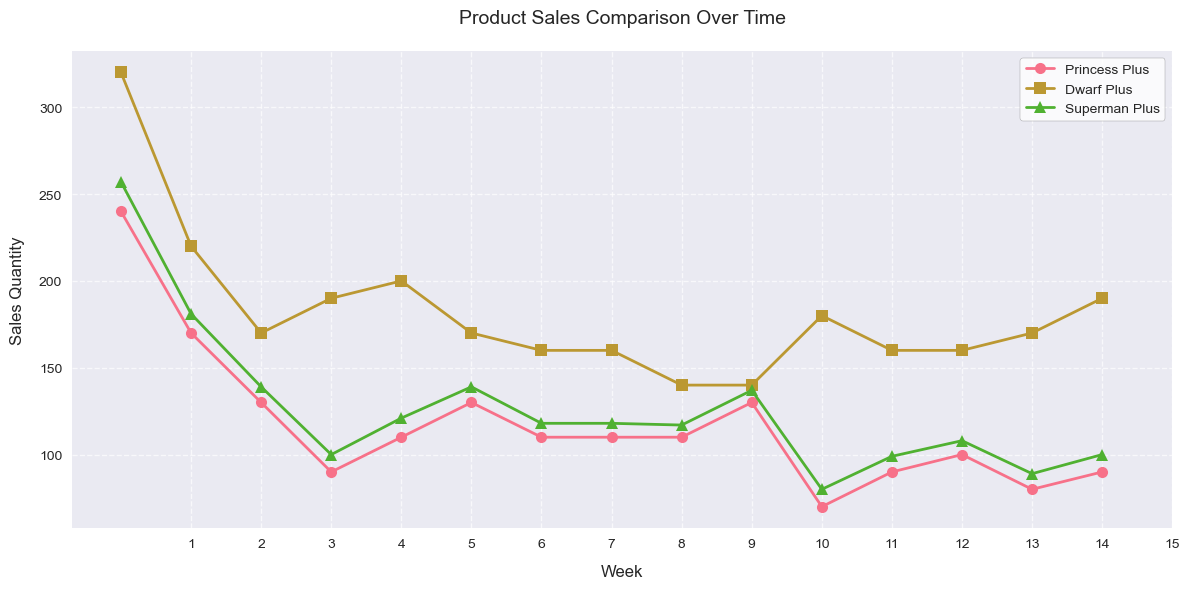

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style
plt.style.use('seaborn')
sns.set_palette("husl")

# Create the figure with a larger size and better DPI
plt.figure(figsize=(12, 6), dpi=100)

# Plot all three products on the same graph
plt.plot(df_princess['AMR'], marker='o', label='Princess Plus', linewidth=2, markersize=8)
plt.plot(df_dwarf['AMR'], marker='s', label='Dwarf Plus', linewidth=2, markersize=8)
plt.plot(results['AMR'], marker='^', label='Superman Plus', linewidth=2, markersize=8)

# Customize the title and labels
plt.title('Product Sales Comparison Over Time', fontsize=14, pad=20)
plt.xlabel('Week', fontsize=12, labelpad=10)
plt.ylabel('Sales Quantity', fontsize=12, labelpad=10)

# Customize the legend
plt.legend(fontsize=10, frameon=True, facecolor='white', edgecolor='gray')

# Customize the grid
plt.grid(True, linestyle='--', alpha=0.7)

# Customize the axes
plt.xticks(range(1, 16), fontsize=10)
plt.yticks(fontsize=10)

# Add padding around the plot
plt.tight_layout()

# Show the plot
plt.show()

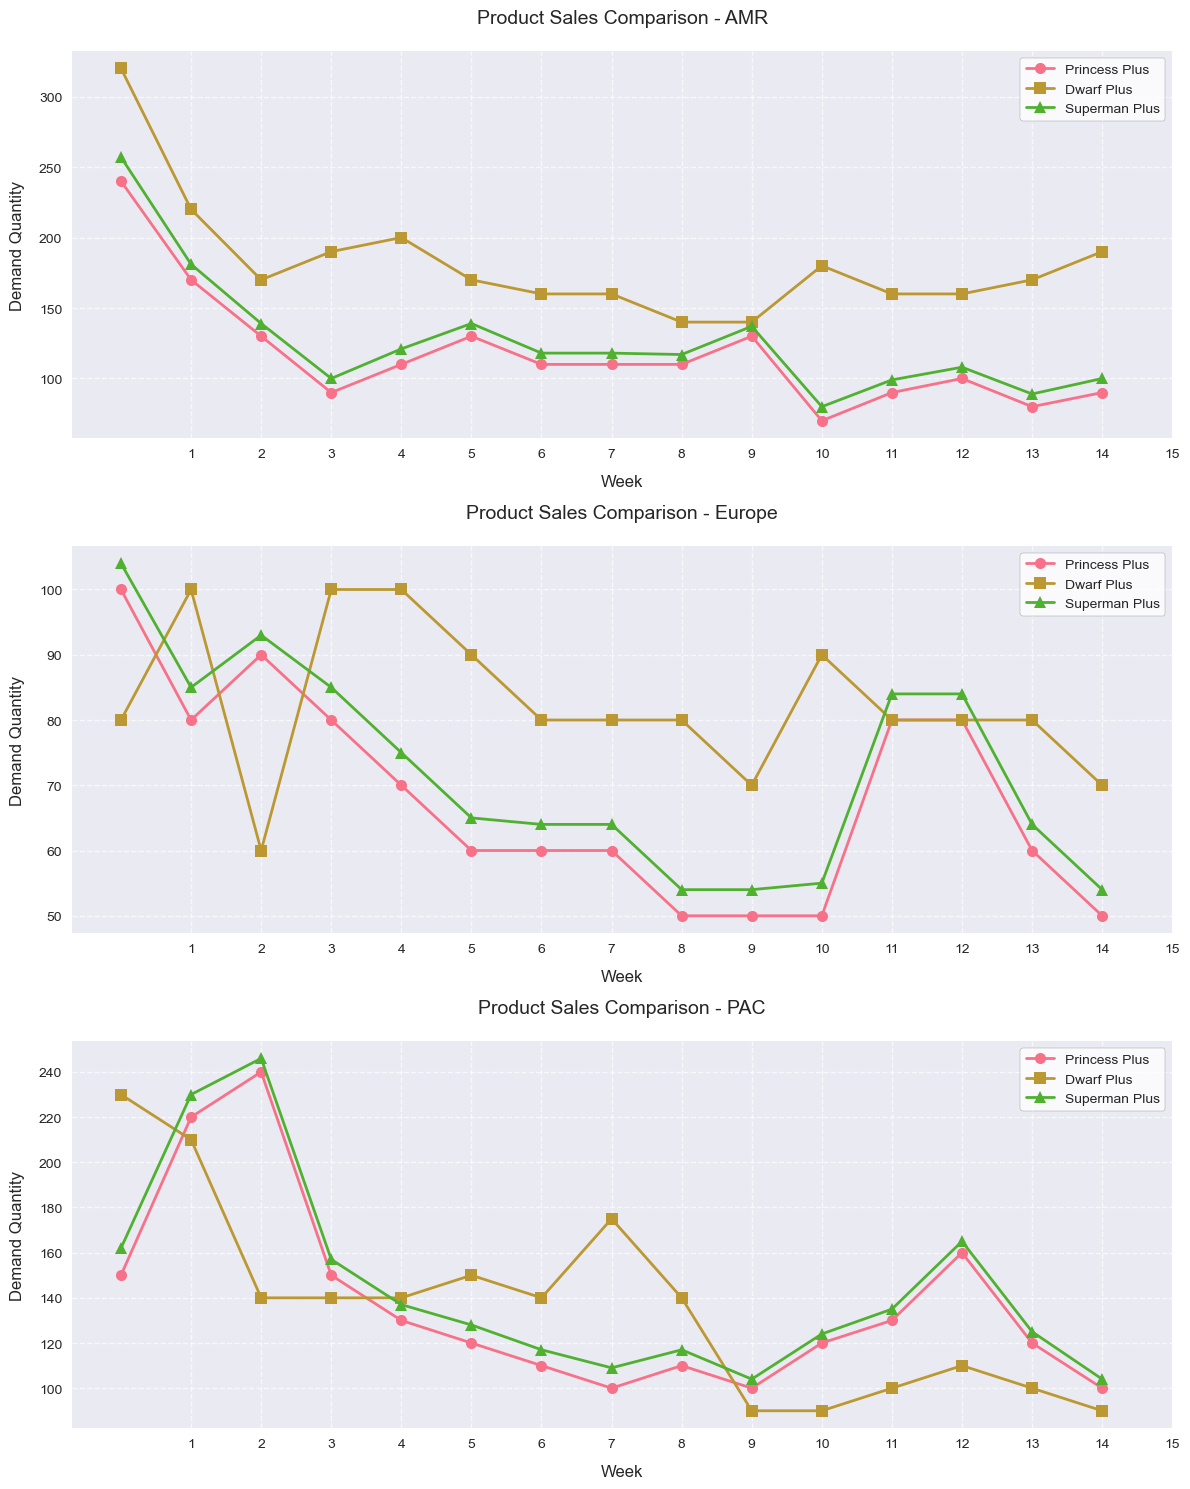

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style
plt.style.use('seaborn')
sns.set_palette("husl")

# Create a figure with three subplots
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 15), dpi=100)

# Function to plot data for each region
def plot_region(ax, region, title):
    ax.plot(df_princess[region], marker='o', label='Princess Plus', linewidth=2, markersize=8)
    ax.plot(df_dwarf[region], marker='s', label='Dwarf Plus', linewidth=2, markersize=8)
    ax.plot(results[region], marker='^', label='Superman Plus', linewidth=2, markersize=8)
    
    ax.set_title(title, fontsize=14, pad=20)
    ax.set_xlabel('Week', fontsize=12, labelpad=10)
    ax.set_ylabel('Demand Quantity', fontsize=12, labelpad=10)
    ax.grid(True, linestyle='--', alpha=0.7)
    ax.legend(fontsize=10, frameon=True, facecolor='white', edgecolor='gray')
    ax.set_xticks(range(1, 16))
    ax.tick_params(axis='both', which='major', labelsize=10)

# Plot for each region
plot_region(ax1, 'AMR', 'Product Sales Comparison - AMR')
plot_region(ax2, 'Europe', 'Product Sales Comparison - Europe')
plot_region(ax3, 'PAC', 'Product Sales Comparison - PAC')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
先